In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


from sklearn.metrics import accuracy_score

In [157]:
df = pd.read_csv('xor.csv')

In [158]:
df.head()

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [159]:
X, y = df.drop(columns=['y']), df['y']

In [160]:
X.shape

(4, 2)

In [161]:
model = Sequential()
model.add(Dense(4, activation='relu', input_dim = X.shape[1]))
model.add(Dense(1, activation='sigmoid'))


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [162]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [163]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate = 0.01), metrics=['accuracy'])

In [164]:
history = model.fit(X, y, epochs=110)

Epoch 1/110
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step - accuracy: 0.7500 - loss: 0.7082
Epoch 2/110
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - loss: 0.7045
Epoch 3/110
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7500 - loss: 0.6993
Epoch 4/110
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7500 - loss: 0.6948
Epoch 5/110
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7500 - loss: 0.6910
Epoch 6/110
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7500 - loss: 0.6873
Epoch 7/110
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7500 - loss: 0.6838
Epoch 8/110
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7500 - loss: 0.6804
Epoch 9/110
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7500 - loss: 0.6771
Epoch 10/110
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7500 - loss: 0.6739
Epoch 11/110
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7500 - loss: 0.6710
Epoch 12/110
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7500 - l

In [165]:
coef_, intercept_ = model.layers[-2].get_weights()

In [166]:
coef_, intercept_

(array([[-0.56857616, -0.20373774,  1.3033339 ,  0.60492843],
        [ 1.0361514 , -0.07325768, -1.3244972 , -0.60818017]],
       dtype=float32),
 array([-0.00139248,  0.        ,  0.00221447,  0.00282644], dtype=float32))

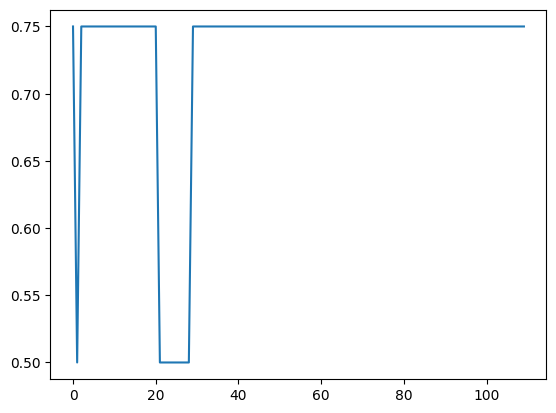

In [167]:
plt.plot(history.history['accuracy'])

In [168]:
y_pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [169]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [170]:
accuracy_score(y_pred, y)

1.0